# Сезонная декомпозиция

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
df = pd.read_csv('data/home_sales.csv')
df.head()

,DATE,sales
0,1973-01-01,55
1,1973-02-01,60
2,1973-03-01,68
3,1973-04-01,63
4,1973-05-01,65


<Axes: >

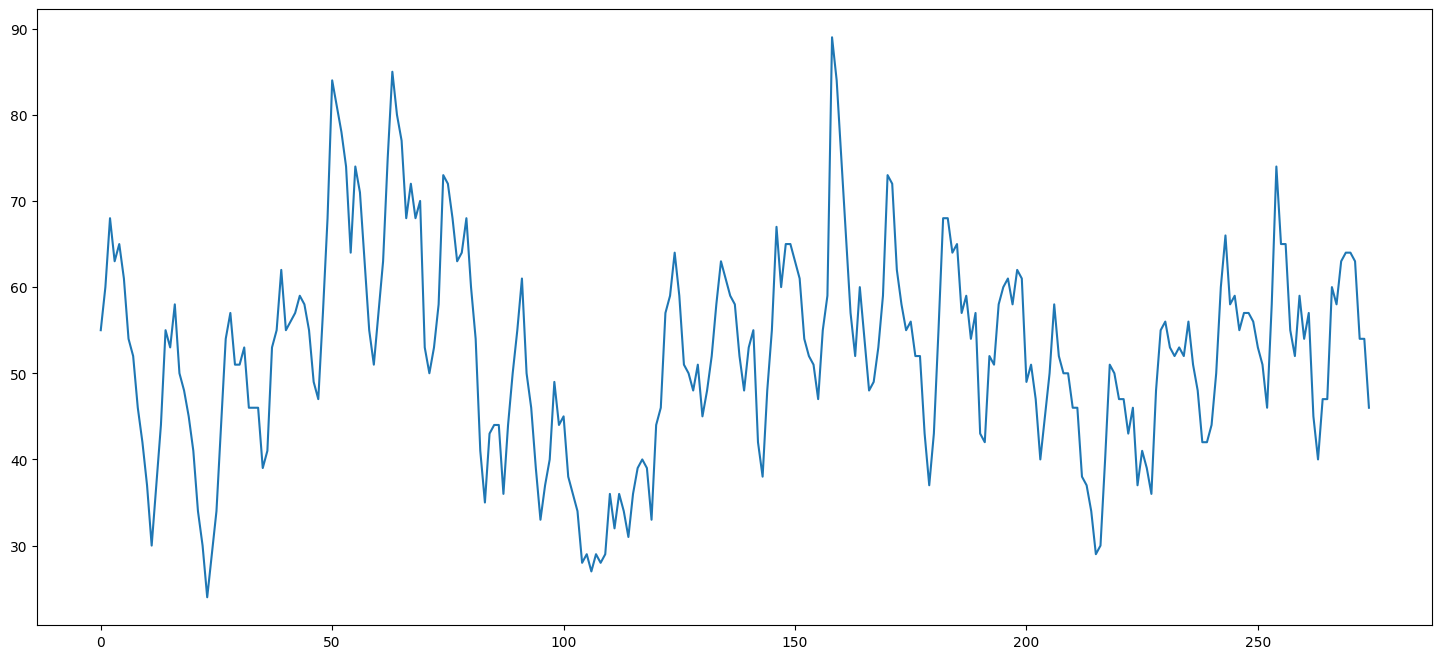

In [7]:
sales = df['sales']
sales.plot(figsize=(18,8))

In [8]:
len(sales)

275

5 вопросов на которые мы должны ответить:
- Есть ли у ряда тренд? Нет у ряда тренд или полином очень высокой степени, что противоречит KISS (не усложняй).
- Есть ли у ряда сезонность? Сезонность есть = есть падения каждые 12 месяцев, есть пики каждые 12 месяцев. Сезонность аддитивная или мультипликативная? Вокруг ряда мы можем нарисовать полоску постоянной ширины, значит у ряда аддитивная сезонность.
- Меняет ли ряд свой характер? Заметным образом нет.
- Есть ли у ряда выбросы? как минимум один есть (около 160 точки) Попробуем поработать с ним (как есть). 
- Есть ли в ряде пропуски. Нет в ряде нет пропусков.

In [10]:
result = seasonal_decompose(sales, model='additive', period=12)

C:\Users\-\AppData\Local\Temp\ipykernel_5980\3388679735.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1800x800 with 0 Axes>

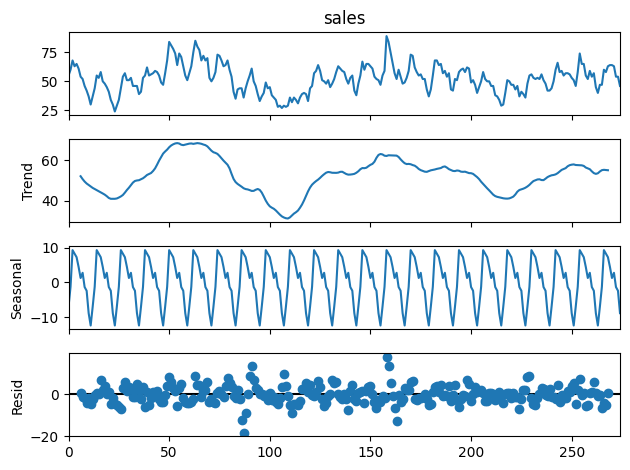

In [11]:
plt.figure(figsize=(18,8))
result.plot()
plt.tight_layout()

Тренд. Обратим внимание: сезонная составляющая ряда отсутствует.

Она отфильтрована скользящим средним.

Text(0.5, 1.0, 'Тренд')

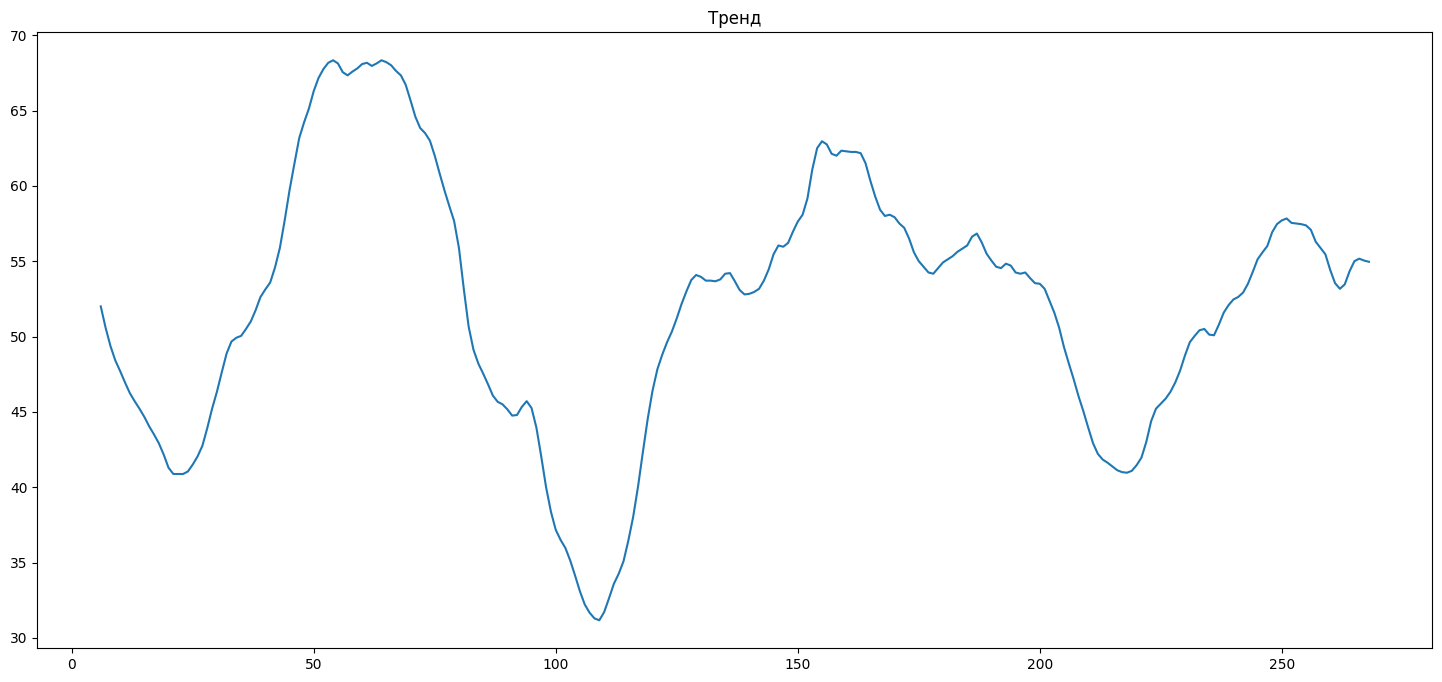

In [12]:
plt.figure(figsize=(18,8))
result.trend.plot()
plt.title('Тренд')

С трендом у нас проблемы. Он построился он виден. Мы с ним согласны. Но если многочлен, то это будет многочлен очень высокой степени. Для подобных рядов гораздо лучше будут работать модели вида ARIMA или экспоненциального сглаживания.
То есть те модели в которых встроена возможность изменения тренда от первого наблюдения до последнего наблюдения (так называемые локальные тренды).

Text(0.5, 1.0, 'Сезонность')

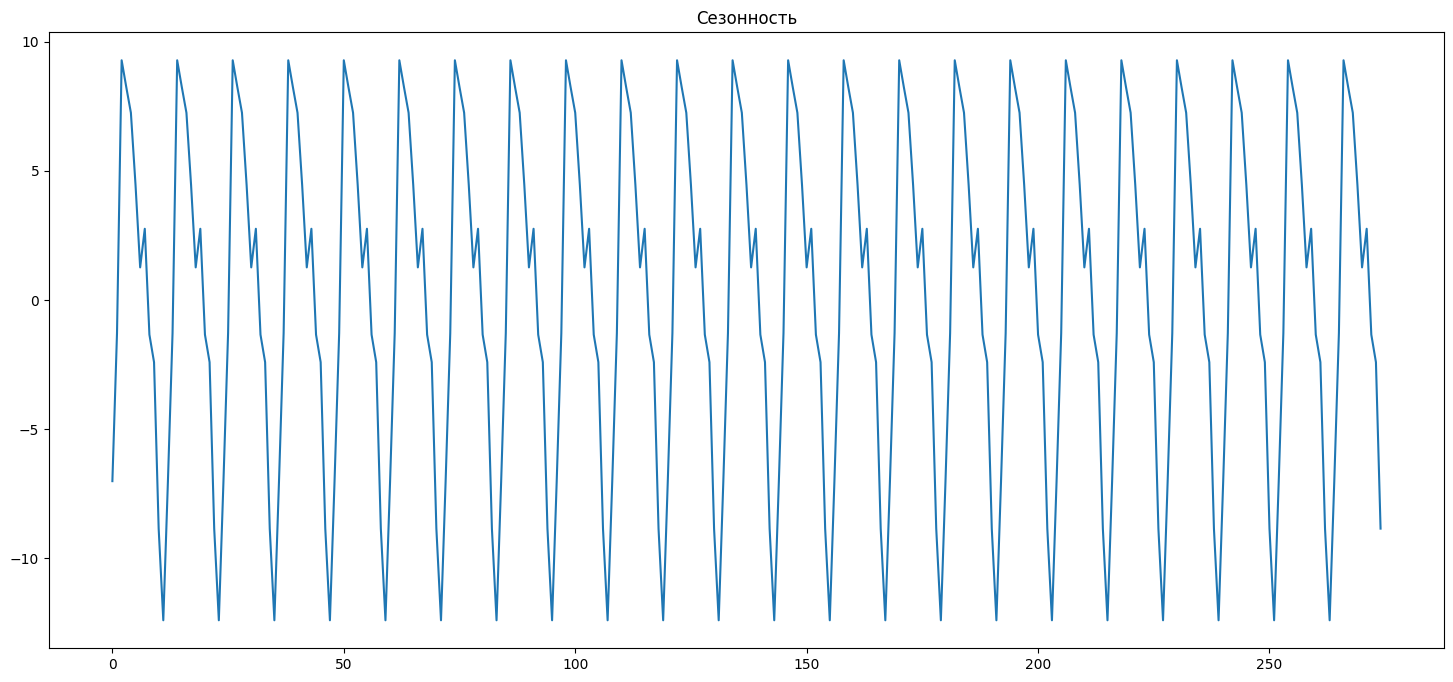

In [13]:
plt.figure(figsize=(18,8))
result.seasonal.plot()
plt.title('Сезонность')

Text(0.5, 1.0, 'Остатки/Ошибки')

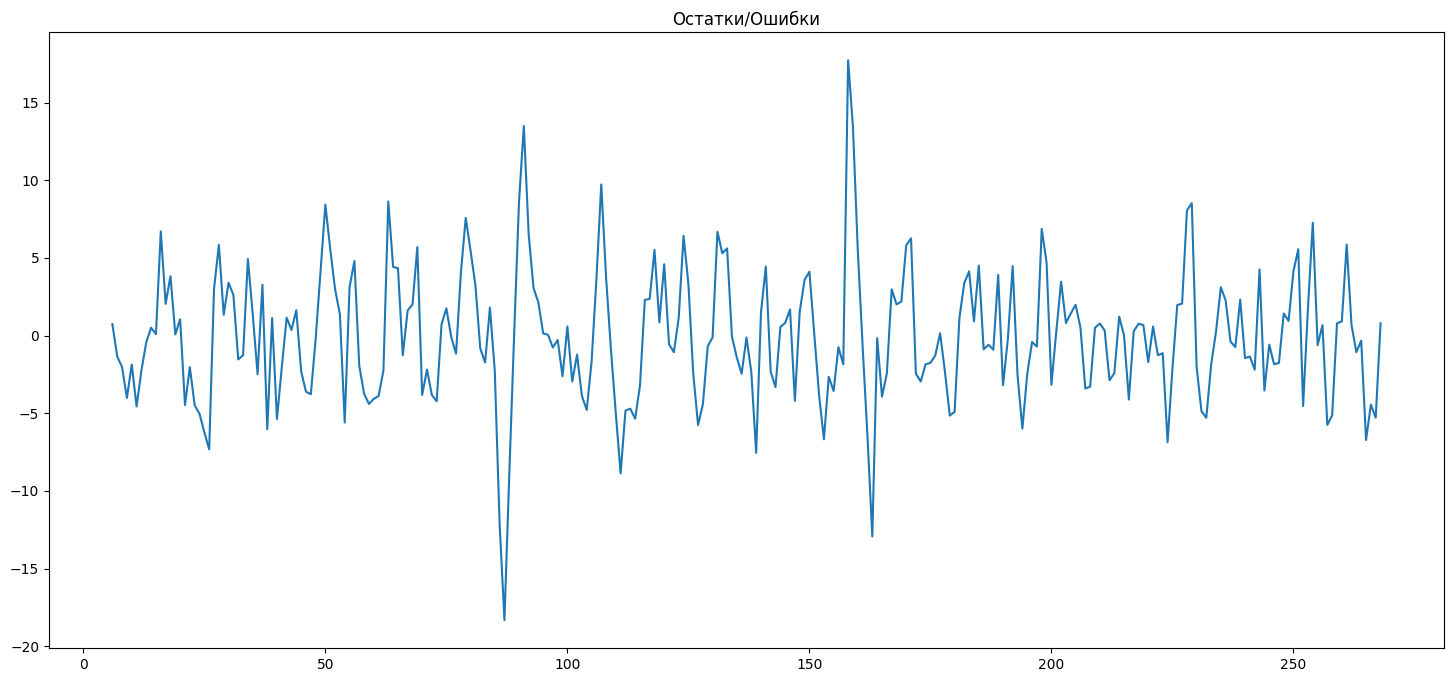

In [14]:
plt.figure(figsize=(18,8))
result.resid.plot()
plt.title('Остатки/Ошибки')

Из остатков/ошибок мы видим, что выброс был не один (около 160), а два (еще около 90), а может даже и 3 (третий около 163).

## Seasonally Adjusted, Сезонно скорректированный ряд (очищенный от сезонности)
Тренд + Ошибка (Тренд * ошибка)


In [15]:
sales_sa = sales - result.seasonal

Text(0.5, 1.0, 'SA plot')

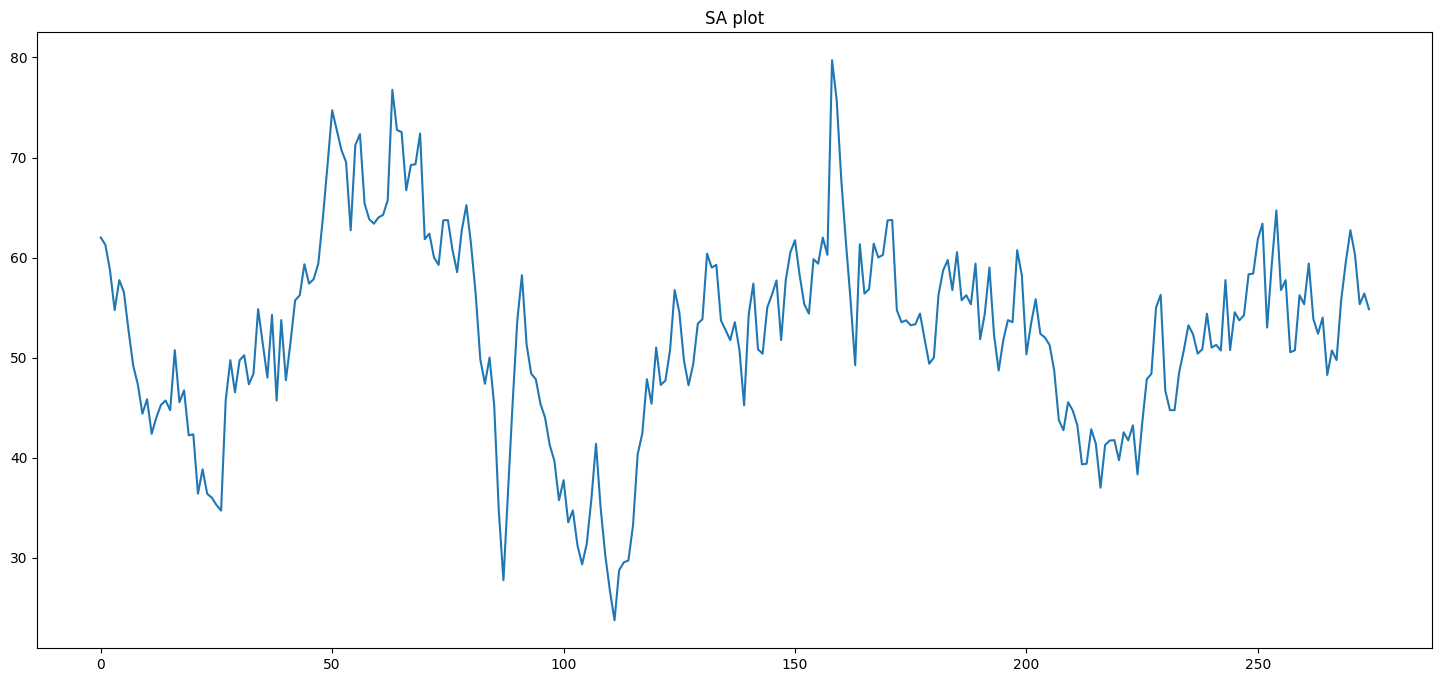

In [16]:
plt.figure(figsize=(18,8))
sales_sa.plot()
plt.title('SA plot')

А прогнозировать этот ряд не будем. 

Текущими инструменты прогнозирования (пройденные в курсе) недостаточны, так как ряд слишком сложен.

Прогноз сможем сделать, когда пройдем тему ARIMA.

# Метод сезонной декомпозиции 

Источник: [Лекция 5. Сезонная декомпозиция. Пример сезонной корректировки ряда. История развития метода ][1]

[1]: https://www.youtube.com/watch?v=0PmA8RG9o8A

# Заметки к лекции

# Развитие сезонной декомпозиции 

(Step 1)

U.S. Census Bureau 

Julius Shiskin

X-1 (1956) начали развивать метод
...
X-11,
X-12-ARIMA (сначала, чтобы заполнить пропуски )

(Step 2)

Eurostat and the European Central Bank
Организовали конкурс по выбору лучшей модели для сезонной декомпозиции.
Победили 2 модели: TRAMO-SEATS (Испанского банка ?)

TRAMO - "Time Series Regression with ARIMA Noise, Missing Observations and Outliers"

SEATS - Signal Extraction in ARIMA Time Series

(Step 3)

Американские исследователи создали гибрид
X-13 ARIMA-SEATS

statsmodels.tsa.x13.x13_arima_analysis

seasonal package R (но не только)

Активное использование ARIMA при моделировании тренда позволило не только проводить сезонную декомпозицию, но и прогнозировать на основании этой же модели.


(Summary)

Что добавилось за 60 лет в метод сезонной декомпозиции

- итеративная процедура коррекции выбросов,
- учет влияния праздников, учет количества рабочих дней,
- прогнозирование

Добавили ARIMA 
- позволило использовать модели для прогнозирования
- спрогнозировать пропуски после использования скользящего среднего

своя версия auto.ARIMA (в версиях от сезонной декомпозиции)

конкурент auto.ARIMA от Роба Хиндмана
надо делать выбор

## В банках и правительствах разделяют
- задачу прогнозирования
- задачу корректировки сезонности

Работают с сезонно скорректированными данными для оценки состояния экономики и перспектив ее развития.